<a href="https://colab.research.google.com/github/MaercioMamedes/analise_dados_BBDC4.SA/blob/main/desafio_pratico_mod_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bootcamp: Analista de Dados com ênfase para Mercado Financeiro
## Desafio Prático - Módulo 1: Fundamentos de Programação para Ciência de Dados

#### **Biblioteca Numpy:**
1. Importar o conjunto de dados em um array Numpy.
2. Calcular estatísticas descritivas básicas para os preços das ações (mínima máxima, média, mediana e desvio padrão). Obs.: Utilizar o preço de fechamento (Close), o mais recomendado para estes tipos de análises.
3. Identificar e tratar possíveis valores ausentes ou discrepantes no
conjunto de dados.


#### **Biblioteca Pandas:**
1. Criar uma coluna que represente a variação percentual diária no preço das
ações.
2. Agrupar e sumarizar os dados por mês, calculando a média e a mediana
das variações percentuais.
3. Exibir a média e a mediana da variação percentual mensal.

#####           * **Biblioteca Matplotlib**
1. Plotar um gráfico de linha para visualizar a evolução do preço das ações
ao longo do tempo.
2. Criar um gráfico de barras para mostrar o volume de negociações por mês.
3. Utilizar gráficos de dispersão para identificar possíveis correlações entre
diferentes variáveis, como preço e volume.

#### **Biblioteca Scikit-learn:**
##### 1º Modelo: Regressão (Previsão Preço)

1. Dividir o conjunto de dados em conjuntos de treinamento e teste.
2. Implementar um modelo de regressão para prever o preço das ações no
próximo mês.
3. Avaliar o desempenho do modelo usando métricas como MSE (Mean
Squared Error) e R2.
4. Plotar o resultado (Real x Previsto).

##### 2º Modelo: Classificação (Previsão Movimento do ativo)
Definindo o problema: vamos tentar prever se o preço das ações subirá
ou descerá no dia seguinte com base nas informações dos dias anteriores.

1. Criar um rótulo binário: 1 se o preço subiu e 0 se o preço desceu.
2. Usar características como preços e volumes anteriores.
3. Dividir o conjunto de dados em treinamento e teste.
4. Treinar um modelo de classificação.
5. Avaliar o modelo no conjunto de testes.
6. Visualizar os resultados.



In [ ]:
# imports

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
bbdc4 = yf.download("BBDC4.SA", start="2008-01-01", end="2023-01-01", period="1d", auto_adjust=True)
bbdc4

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BBDC4.SA,BBDC4.SA,BBDC4.SA,BBDC4.SA,BBDC4.SA
Date,,,,,
2008-01-02,11.103454,11.912120,11.082503,11.861840,0
2008-01-03,10.877067,11.250043,10.833064,11.147369,0
2008-01-04,10.749246,11.074028,10.654954,10.979737,5694095
2008-01-07,10.948317,11.086611,10.795354,10.801640,0
2008-01-08,11.115932,11.354805,11.055167,11.147363,0
...,...,...,...,...,...
2022-12-23,12.793001,12.911298,12.598655,12.632454,21104200
2022-12-26,12.488808,12.784551,12.455009,12.750752,13937200


In [ ]:
bbdc4.reset_index(inplace=True)


In [ ]:
bbdc4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3722 entries, 0 to 3721
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   (Date, )            3722 non-null   datetime64[ns]
 1   (Close, BBDC4.SA)   3722 non-null   float64       
 2   (High, BBDC4.SA)    3722 non-null   float64       
 3   (Low, BBDC4.SA)     3722 non-null   float64       
 4   (Open, BBDC4.SA)    3722 non-null   float64       
 5   (Volume, BBDC4.SA)  3722 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 174.6 KB


In [ ]:
array_bbdc4 = np.array(bbdc4)

array([[Timestamp('2008-01-02 00:00:00'), 11.103453636169434,
        11.912119818737784, 11.08250315231209, 11.861840195553672, 0],
       [Timestamp('2008-01-03 00:00:00'), 10.877066612243652,
        11.250042898142881, 10.833063981050183, 11.147369451044856, 0],
       [Timestamp('2008-01-04 00:00:00'), 10.749245643615723,
        11.074028155547914, 10.654954318784934, 10.979736830717128,
        5694095],
       ...,
       [Timestamp('2022-12-27 00:00:00'), 12.42966079711914,
        12.65780506921418, 12.302914068825899, 12.624005887946915,
        78235200],
       [Timestamp('2022-12-28 00:00:00'), 12.809898376464844,
        12.86904672647191, 12.412757497958955, 12.46345665927632,
        45117800],
       [Timestamp('2022-12-29 00:00:00'), 12.8014497756958,
        13.080293178710773, 12.78455059064067, 12.885948118479213,
        41911700]], dtype=object)

In [ ]:
# prompt: calcular mínima, máxima, média, mediana e desvio padrão da segunda coluna

# Calculando a mínima, máxima, média, mediana e desvio padrão da segunda coluna (index 1)
minimo = np.min(array_bbdc4[:, 1])
maximo = np.max(array_bbdc4[:, 1])
media = np.mean(array_bbdc4[:, 1])
mediana = np.median(array_bbdc4[:, 1])
desvio_padrao = np.std(array_bbdc4[:, 1])

print(f"Mínimo: {minimo}")
print(f"Máximo: {maximo}")
print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Desvio Padrão: {desvio_padrao}")


Mínimo: 4.771298885345459
Máximo: 21.690441131591797
Média: 10.471759060260624
Mediana: 8.80682373046875
Desvio Padrão: 4.526821412468304


In [ ]:
data = array_bbdc4[:, 0]
data

array([Timestamp('2008-01-02 00:00:00'), Timestamp('2008-01-03 00:00:00'),
       Timestamp('2008-01-04 00:00:00'), ...,
       Timestamp('2022-12-27 00:00:00'), Timestamp('2022-12-28 00:00:00'),
       Timestamp('2022-12-29 00:00:00')], dtype=object)

In [ ]:
fechamento = array_bbdc4[:, 1]
fechamento

array([11.103453636169434, 10.877066612243652, 10.749245643615723, ...,
       12.42966079711914, 12.809898376464844, 12.8014497756958],
      dtype=object)

<ipython-input-44-ccc0d5a2d3d8>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=data, y=fechamento, palette="mako")


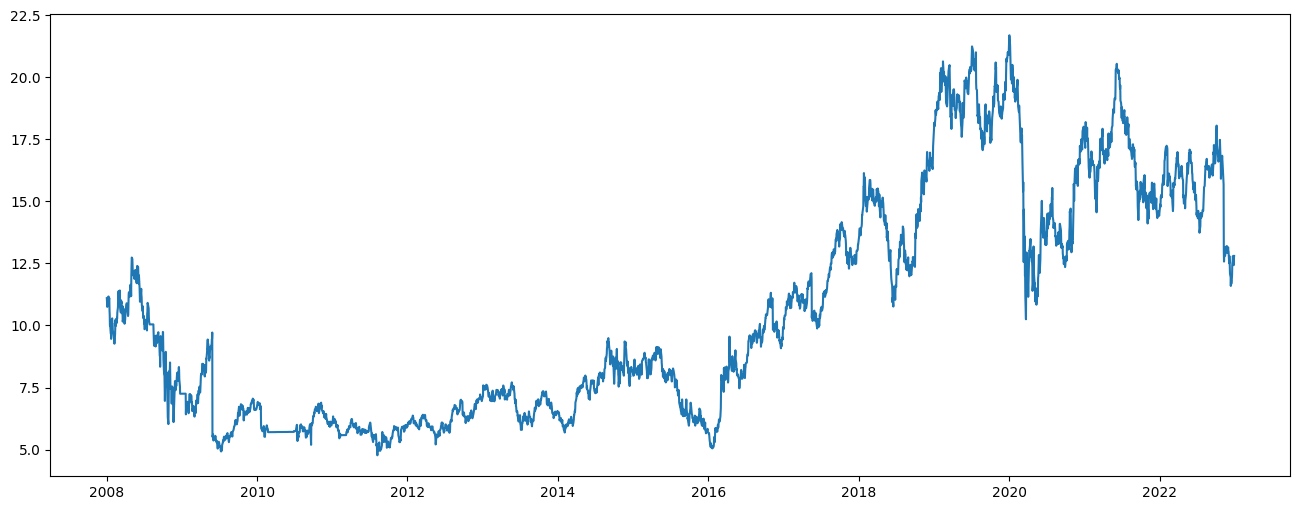

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x=data, y=fechamento, palette="mako")
plt.show();

In [ ]:
# prompt: no dataframe bbdc4 selecione os valores da coluna de fechamento de 01-01-2010 a 01-06-2010

# Convert the 'Date' column to datetime objects
bbdc4['Date'] = pd.to_datetime(bbdc4['Date'])

# Filter the DataFrame for the specified date range
start_date = pd.to_datetime('2010-01-01')
end_date = pd.to_datetime('2010-12-31')
filtered_bbdc4 = bbdc4[(bbdc4['Date'] >= start_date) & (bbdc4['Date'] <= end_date)]

# Select the 'Close' column values
closing_prices = filtered_bbdc4[['Date','Close']]

# Print or further process the closing prices
closing_prices.reset_index(drop=True, inplace=True)
closing_prices


Price,Date,Close
Ticker,,BBDC4.SA
0,2010-01-04,6.923975
1,2010-01-05,6.889900
2,2010-01-06,6.834786
3,2010-01-07,6.816411
4,2010-01-08,6.809066
...,...,...
242,2010-12-23,6.104881
243,2010-12-27,5.981743
244,2010-12-28,5.970541


<ipython-input-66-a4fc6c4b8ddf>:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=data_close, y=fechamento_close, palette="mako")


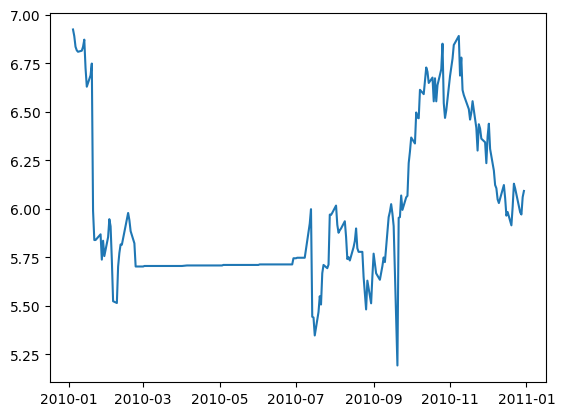

In [ ]:
data_close = np.array(closing_prices['Date'])

fechamento_close = np.array(closing_prices['Close'])

data_close = np.array(closing_prices['Date'])

# Flatten the fechamento_close array to 1D using .flatten() or .ravel()
fechamento_close = np.array(closing_prices['Close']).flatten()

sns.lineplot(x=data_close, y=fechamento_close, palette="mako")
plt.show();

In [ ]:
(bbdc4['Close'] == 5.71).sum()

,0
Ticker,
BBDC4.SA,0


In [ ]:
bbdc4_dividend = yf.Ticker("BBDC4.SA")
bbdc4_dividend.dividends

,Dividends
Date,
2008-01-03 00:00:00-02:00,0.003988
2008-02-06 00:00:00-02:00,0.004691
2008-03-04 00:00:00-03:00,0.004691
2008-04-02 00:00:00-03:00,0.004691
2008-05-05 00:00:00-03:00,0.004691
...,...
2024-11-04 00:00:00-03:00,0.018975
2024-12-03 00:00:00-03:00,0.018975
2025-01-02 00:00:00-03:00,0.293976


In [ ]:
5//2

2